In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load the Data
data = pd.read_excel('https://www.dropbox.com/scl/fi/lxmhgobfbyqc9nc60f22p/Preliminary-college-year.xlsx?rlkey=7j0v9zd72n33mwmpxm3r9dhwq&dl=1')

# Drop columns that contain non-numeric text entries, such as reasons for dismissal
drop_columns = ['Reason for not Completing Connect', 'Reason not Retained']
data = data.drop(columns=drop_columns)
data

,High School GPA,SAT Score,Federal Ethnic Group,Gender,"Pell Grant Eligible? (1=yes, 0=no)","Attended Orientation? (1=yes, 0=no)","Attended Experience Day? (1=yes, 0=no)","Resident/Commuter (1=resident, 0=commuter)","Athlete? (1=yes, 0=no)","Completed Summer Bridge? (2=completed all, 1=completed at least half, 0=did not complete)",...,"Completed Community Service Requirement? (1=yes, 0=no)",Number of Faculty Advisor Meetings Attended,Number of Peer Mentor Meetings Attended,Number of Workshops Attended,F17 GPA,S18 GPA,CUM GPA,Number of Credits Earned,"Completed Connect? (1=yes, 0=no)","Retained F17-F18? (1=yes, 0=no)"
0,2.595,970.0,White,F,0.0,1.0,0.0,1.0,1.0,2.0,...,1.0,5.0,2.0,2.0,0.660,2.200,1.788,18.0,0,0.0
1,2.637,1020.0,White,F,0.0,1.0,0.0,1.0,1.0,2.0,...,0.0,3.0,1.0,2.0,1.567,1.660,1.625,18.0,0,0.0
2,2.803,930.0,Black/African American,F,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,2.0,2.0,3.0,2.425,2.250,2.338,24.0,1,0.0
3,2.354,1080.0,Hispanic/Latino,M,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,2.0,2.0,0.0,0.925,NaN,NaN,6.0,0,0.0
4,2.850,880.0,White,F,1.0,1.0,1.0,0.0,0.0,2.0,...,1.0,9.0,3.0,3.0,3.200,1.680,2.250,18.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2.319,950.0,White,M,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,3.0,3.0,1.0,1.925,1.740,1.822,24.0,1,1.0
104,2.021,1140.0,White,M,0.0,1.0,1.0,1.0,0.0,2.0,...,1.0,1.0,5.0,3.0,1.660,1.825,1.950,21.0,1,1.0
105,2.139,1110.0,Black/African American,M,0.0,1.0,1.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0,0.0
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Step 2: Data Preprocessing
# Clean binary columns by coercing non-numeric values to NaN, then filling with 0 and converting to integers
binary_columns = [
    'Pell Grant Eligible? (1=yes, 0=no)', 'Attended Orientation? (1=yes, 0=no)',
    'Attended Experience Day? (1=yes, 0=no)', 'Resident/Commuter (1=resident, 0=commuter)',
    'Athlete? (1=yes, 0=no)', 'Completed Connect? (1=yes, 0=no)',
    'Retained F17-F18? (1=yes, 0=no)', 'Completed Campus Event Requirement? (1=yes, 0=no)',
    'Completed Community Service Requirement? (1=yes, 0=no)'
]
for col in binary_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce').fillna(0).astype(int)

# Handle non-numeric values in numerical columns by coercing to NaN, then filling with the column mean
numerical_cols = [
    'High School GPA', 'SAT Score', 'Number of Peer Mentor Meetings Attended',
    'Number of Workshops Attended', 'F17 GPA', 'S18 GPA', 'CUM GPA',
    'Number of Credits Earned', 'Completed Summer Bridge? (2=completed all, 1=completed at least half, 0=did not complete)'
]
for col in numerical_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Ensure there are no NaNs left by dropping any remaining rows with NaN values
data = data.dropna()
data


,High School GPA,SAT Score,Federal Ethnic Group,Gender,"Pell Grant Eligible? (1=yes, 0=no)","Attended Orientation? (1=yes, 0=no)","Attended Experience Day? (1=yes, 0=no)","Resident/Commuter (1=resident, 0=commuter)","Athlete? (1=yes, 0=no)","Completed Summer Bridge? (2=completed all, 1=completed at least half, 0=did not complete)",...,"Completed Community Service Requirement? (1=yes, 0=no)",Number of Faculty Advisor Meetings Attended,Number of Peer Mentor Meetings Attended,Number of Workshops Attended,F17 GPA,S18 GPA,CUM GPA,Number of Credits Earned,"Completed Connect? (1=yes, 0=no)","Retained F17-F18? (1=yes, 0=no)"
0,2.595,970.0,White,F,0,1,0,1,1,2.0,...,1,5.0,2.0,2.0,0.660000,2.200000,1.788000,18.0,0,0
2,2.803,930.0,Black/African American,F,1,1,1,1,0,1.0,...,1,2.0,2.0,3.0,2.425000,2.250000,2.338000,24.0,1,0
3,2.354,1080.0,Hispanic/Latino,M,0,1,1,1,0,1.0,...,0,2.0,2.0,0.0,0.925000,2.436897,2.572368,6.0,0,0
4,2.850,880.0,White,F,1,1,1,0,0,2.0,...,1,9.0,3.0,3.0,3.200000,1.680000,2.250000,18.0,1,1
5,2.763,940.0,Black/African American,F,1,1,1,1,0,2.0,...,1,3.0,3.0,5.0,3.000000,3.244000,3.126000,31.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2.522,880.0,White,M,1,1,1,1,0,2.0,...,1,4.0,3.0,4.0,2.923000,3.000000,2.963000,24.0,1,1
101,2.412,960.0,White,M,0,1,1,1,0,2.0,...,1,3.0,4.0,3.0,3.080000,3.340000,3.210000,30.0,1,1
103,2.319,950.0,White,M,1,1,1,1,1,1.0,...,1,3.0,3.0,1.0,1.925000,1.740000,1.822000,24.0,1,1
104,2.021,1140.0,White,M,0,1,1,1,0,2.0,...,1,1.0,5.0,3.0,1.660000,1.825000,1.950000,21.0,1,1


In [ ]:
# Select categorical and numerical features
categorical_cols = ['Federal Ethnic Group', 'Gender']

# Create dummy variables for categorical data
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)



In [ ]:
# Define the feature set (X) and the target variable (y)
X = data[numerical_cols + list(data.columns[len(numerical_cols):])].copy()
y = data['Retained F17-F18? (1=yes, 0=no)']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Standardize the data without using a pipeline
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the Logistic Regression model
logistic_regression = LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.5 ,C=0.5, max_iter=1000)
logistic_regression.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred = logistic_regression.predict(X_test_scaled)
y_pred_proba = logistic_regression.predict_proba(X_test_scaled)[:, 1]

Class Distribution:
 Retained F17-F18? (1=yes, 0=no)
1    61
0    32
Name: count, dtype: int64


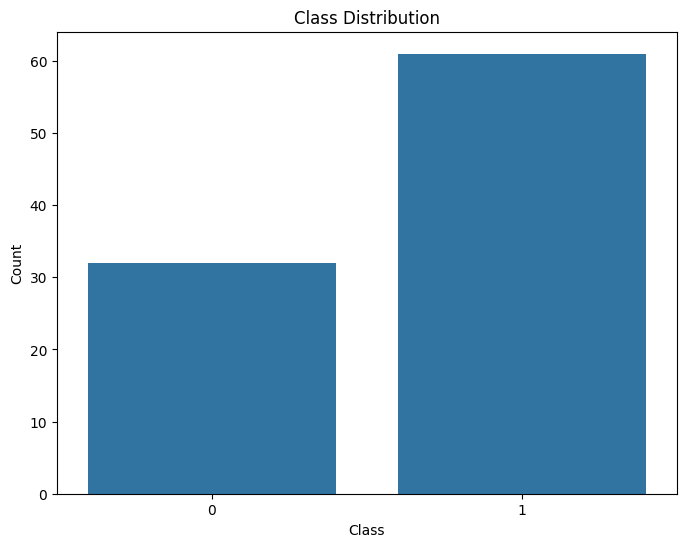

In [ ]:
# Check class imbalance in the target variable
class_distribution = y.value_counts()
print("Class Distribution:\n", class_distribution)

# Optional: Visualize the class distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Example of predicted probabilities for the first few test samples
print("\nPredicted Probabilities for passing:\n", y_pred_proba[:5])

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        29

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47


Predicted Probabilities for passing:
 [0.10398695 0.08534665 0.95798404 0.94347825 0.10398695]


In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(logistic_regression, X_train_scaled, y_train, cv=5)  # 5-fold cross-validation

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train Logistic Regression on PCA-transformed data
logistic_regression = LogisticRegression(solver='liblinear', C=1.0)
logistic_regression.fit(X_train_pca, y_train)

# Make predictions
y_pred_pca = logistic_regression.predict(X_test_pca)

# Evaluate
print("Accuracy (PCA):", accuracy_score(y_test, y_pred_pca))
print("\nClassification Report (PCA):\n", classification_report(y_test, y_pred_pca))
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Accuracy (PCA): 0.9787234042553191

Classification Report (PCA):
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.97      0.98        29

    accuracy                           0.98        47
   macro avg       0.97      0.98      0.98        47
weighted avg       0.98      0.98      0.98        47

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0
